In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("duolingo_reviews_cleaned.csv")

In [3]:
#vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, min_df=5, max_df=0.8)
X = vectorizer.fit_transform(df['content'])

In [4]:
#apply LDA for thematic analysis with 4 themes
lda = LatentDirichletAllocation(
n_components=4, 
random_state=42,
learning_method="online"
)
lda.fit(X)

,n_components,4
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'online'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [5]:
# get the top words in each theme
terms = vectorizer.get_feature_names_out()
themes = {}
for idx, topic in enumerate(lda.components_):
    top_terms = [terms[i] for i in topic.argsort()[-10:]] # top 10 words
    themes[f"Theme {idx+1}"] = top_terms

In [6]:
print("\n--- Extracted Themes (Top 10 Words) ---")
for theme, words in themes.items():
    print(f"{theme}: {', '.join(words)}")


--- Extracted Themes (Top 10 Words) ---
Theme 1: way, language, easy, really, learn, english, fun, learning, app, great
Theme 2: better, application, learn, really, learned, spanish, like, just, game, helpful
Theme 3: learning, help, thank, learn, languages, useful, duolingo, love, app, good
Theme 4: awesome, cool, experience, english, learn, language, learning, app, nice, best


In [7]:
#assign each review to its most likely theme
topic_distribution = lda.transform(X) # shape = (n_docs (reviews), n_themes)
dominant_topic = topic_distribution.argmax(axis=1)
df['Theme'] = dominant_topic + 1

In [8]:
#provide themes with names
theme_names = {
1: "Daily Practice & Motivation",
2: "App Bugs & Issues",
3: "Lesson Difficulty",
4: "Vocabulary Learning"
}
df['Theme_Name'] = df['Theme'].map(theme_names)

In [9]:
# distribution of reviews across themes
theme_counts = df['Theme'].value_counts(normalize=True) * 100
print("\n--- Theme Distribution ---")
for theme, perc in theme_counts.items():
    print(f"{theme_names[theme]}: {perc:.2f}%")


--- Theme Distribution ---
Daily Practice & Motivation: 42.18%
App Bugs & Issues: 21.75%
Lesson Difficulty: 19.42%
Vocabulary Learning: 16.65%


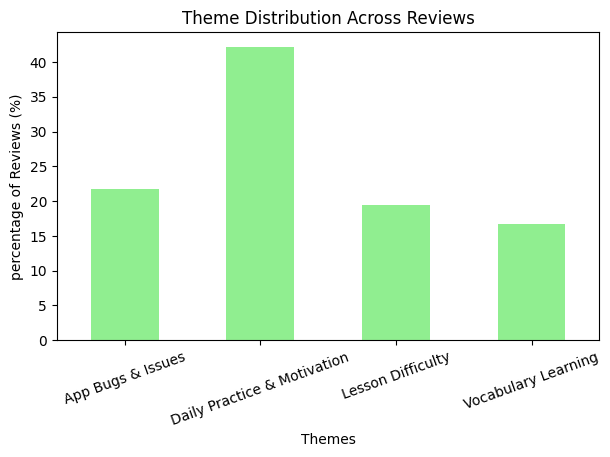

In [10]:
theme_counts = df['Theme_Name'].value_counts(normalize=True) * 100
plt.figure(figsize=(7,4))
theme_counts.sort_index().plot(kind='bar', color='lightgreen')
plt.title("Theme Distribution Across Reviews")
plt.xlabel("Themes")
plt.ylabel("percentage of Reviews (%)")
plt.xticks(rotation=20)
plt.show()

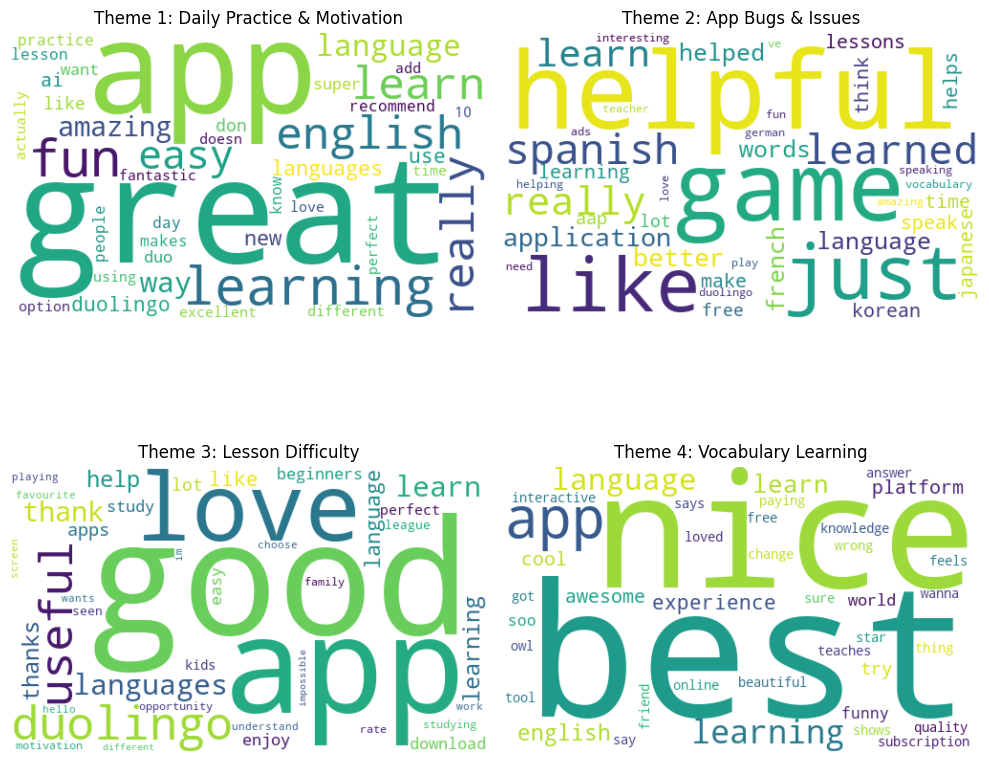

In [12]:
#WordCloud for each theme ---
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 4 themes → 2x2 grid
for idx, topic in enumerate(lda.components_):
    top_words = {terms[i]: topic[i] for i in topic.argsort()[-40:]}  
    wc = WordCloud(width=500, height=300, background_color="white", colormap="viridis")
    wc.generate_from_frequencies(top_words)
    
    ax = axes[idx//2, idx%2]
    ax.imshow(wc, interpolation="bilinear")
    ax.set_title(f"Theme {idx+1}: {theme_names[idx+1]}", fontsize=12)
    ax.axis("off")

plt.tight_layout()
plt.show()
